# Euler's Method: Truncation Error

Like all numerical methods, Euler's method has systemic error. This is introduced when we discard the higher order terms in the Taylor expansion. The **local** truncation error is thus:

$$
E_{n+1} = \tfrac{1}{2} y^{\prime\prime}(x_n) h^2 + \mathcal(h^3)
$$

If you are unfamiliar with the notation for $\mathcal(h^3)$ (big O notation), in this case it stands for all the terms where the lowest order of $h$ is 3. The $h^3$ term is more relevant than higher order terms for $0 < h < 1$.

The **local** truncation error is associated with a single integration step. It is far more useful, however, to consider the **global** truncation error, which is the error accumulated over multiple integration steps. The global truncation error is $\mathcal(h)$ {% cite efferson-numerical-methods %}. The derivation for the bounds of the error are beyond the scope of the course. As this error approximately scales linearly with $h$, reducing the size of $h$ will generally reduce the global error:

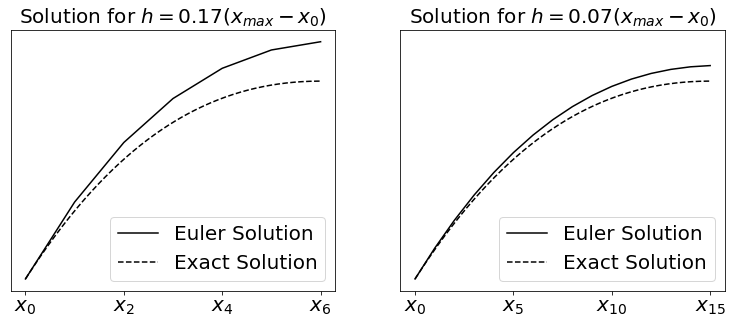

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#h = 0.5
h_list = [0.5, 0.2]
hlims = [0.5, 0.05]
xlims = [0, 3]
skip = [2, 5]
fontsize =20
#filenum = 1
###Function
def fprime(a, x, y):
    return 3*a[0]*x*x + 2*a[1]*x + a[2]

def f(a,x):
    return a[0]*x*x*x + a[1]*x*x + a[2]*x + a[3]

def sp_to_cubic(sp_xy):
    X = np.zeros((4,4))
    Y = np.zeros((4,1))
    
    X[::2,0] = 3*sp_xy[:,0]**2
    X[::2,1] = 2*sp_xy[:,0]
    X[::2,2] = 1
    
    X[1::2,0] = sp_xy[:,0]**3
    X[1::2,1] = sp_xy[:,0]**2
    X[1::2,2] = sp_xy[:,0]
    X[1::2,3] = 1
    
    Y[1::2,0] = sp_xy[:,1]
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    return np.array(X.I*Y).flatten()

def euler(a, xlims, h):
    x_euler = np.arange(xlims[0], xlims[1] + h, h)
    y_euler = np.zeros(x_euler.size)
    
    x_euler[0] = xlims[0]
    y_euler[0] = f(a, x_euler[0])
    
    x_ticks = [r'$x_0$']*x_euler.size
    y_ticks = [r'$y_0$']*x_euler.size
    
    for i in range(1, x_euler.size):
        y_euler[i] = y_euler[i-1] + h*fprime(a, x_euler[i-1], y_euler[i-1])
        
        x_ticks[i] = r'$x_{{{}}}$'.format(i)
        y_ticks[i] = r'$y_{{{}}}$'.format(i)
    
    return x_euler,y_euler,x_ticks,y_ticks

def rel_h(h, xlims):
    return r'$h = {:.2f} (x_{{max}} - x_0)$'.format(h/(xlims[1] - xlims[0]))

##Euler
a = sp_to_cubic(np.array([[3, 10],[7, 5]]))

x_euler = [0]*len(h_list)
y_euler = [0]*len(h_list)
x_ticks = [0]*len(h_list)
y_ticks = [0]*len(h_list)
#####Plotting
x = np.linspace(xlims[0], xlims[1], 1000)    

fig, ax = plt.subplots(1,2, figsize = (12.8, 4.8), sharey = True)
##Euler solution
for i, h in enumerate(h_list):
    x_euler[i],y_euler[i],x_ticks[i],y_ticks[i] = euler(a,xlims, h)
    
    ax[i].plot(x_euler[i], y_euler[i], 'k-', label = 'Euler Solution')
    ax[i].plot(x, f(a,x), 'k--', label = 'Exact Solution')
    
    ylim = ax[i].get_ylim()
    xlim = ax[i].get_xlim()
    
    #for i in range(x_euler.size):
    #    plt.vlines(x = x_euler[i], ymin = -100, ymax = y_euler[i], color = 'black',
    #               linestyles = ':')
    #    plt.hlines(y = y_euler[i], xmin = -100, xmax = x_euler[i], color = 'black',
    #               linestyles = ':')
    
    ax[i].set_title(r'Solution for $h = {:.2f} (x_{{max}} - x_0)$'.format(
            h/(xlims[1] - xlims[0])), 
            fontsize = fontsize)
    
    ax[i].set_ylim(ylim)
    ax[i].set_xlim(xlim)
    ax[i].set_xticks(x_euler[i][::skip[i]])
    ax[i].set_xticklabels(x_ticks[i][::skip[i]], fontsize = fontsize)
    ax[i].set_yticks([])
    #ax[i].set_yticks(y_euler[i][::skip[i]])
    #ax[i].set_yticklabels(y_ticks[i][::skip[i]], fontsize = fontsize)
    ax[i].legend(fontsize = fontsize)
plt.show()

We can illustrate the relationship between the global error and $h$ directly by looking at the magnitude of error at the same final $x$ value for different $h$ values:

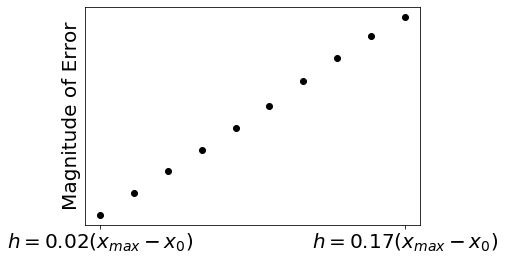

In [13]:
##Plotting different errors values for x_max:
h_vals = np.linspace(hlims[0], hlims[1], 10)

e_vals = np.zeros(10)

for i,h in enumerate(h_vals):
    e_vals[i] = abs(euler(a, xlims, h)[1][-1] - f(a, xlims[1]))

fig, ax = plt.subplots()
    
ax.plot(h_vals, e_vals, 'ko')

ax.set_xticks(hlims)
ax.set_xticklabels([rel_h(hlims[0], xlims), rel_h(hlims[1], xlims)], fontsize = fontsize)
ax.set_yticks([])
ax.set_ylabel('Magnitude of Error', fontsize = fontsize)

plt.show()

There is a limit to how much reducing $h$ will help you. If $h$ is too small you could introduce floating point errors, that is when operations require more precision than afforded by the float data type. Reducing the size of $h$ also means that you will have more steps to integrate to a final $x$, which increases the computational time.

## References
{% bibliography --cited %}